In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
df=pd.read_csv(r"data\merged_dataset.csv")

In [5]:
df.head()

,id,title,category,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.shape

(75683, 4)

In [7]:
df.drop(columns=["id","title"], axis=1 , inplace=True)

In [8]:
df = df.rename(columns={"category":"sentiment"})

In [9]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

4737

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df["sentiment"].value_counts()

sentiment
Negative      21330
Positive      19272
Neutral       17285
Irrelevant    12372
label             1
Name: count, dtype: int64

In [15]:
# remoe the "label" rows
df = df[df["sentiment"] != "label"]

In [16]:
df["sentiment"].value_counts()

sentiment
Negative      21330
Positive      19272
Neutral       17285
Irrelevant    12372
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

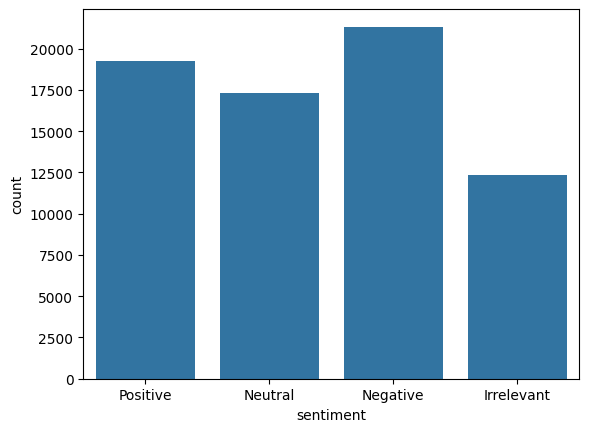

In [17]:
sns.countplot(data=df, x='sentiment',)

In [18]:
#Here i am checking how many row present in the dataset which one 5 charters present
sum(df['text'].apply(len)>5) , sum(df['text'].apply(len)<=5)

(69734, 525)

In [19]:
# here we can seen that less than 5 charcters rows  subtracted form the dataset
df = df[df['text'].apply(len)>5]

In [20]:
df.shape

(69734, 2)

# EDA

In [21]:
# count number of sentence 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# num of characters
df['num_characters'] = df['text'].apply(len)

In [27]:
# num of words
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [30]:
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,sentiment,text,num_characters,num_words,num_sentence
0,Positive,im getting on borderlands and i will murder yo...,53,11,1
1,Positive,I am coming to the borders and I will kill you...,51,13,1
2,Positive,im getting on borderlands and i will kill you ...,50,11,1
3,Positive,im coming on borderlands and i will murder you...,51,11,1
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1


In [36]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,69734.000000,69734.000000,69734.000000
mean,113.679009,23.579144,1.990535
std,78.329879,16.946730,1.652396
min,6.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,96.000000,19.000000,1.000000
75%,157.000000,33.000000,2.000000
max,957.000000,198.000000,33.000000


In [38]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

<Axes: >

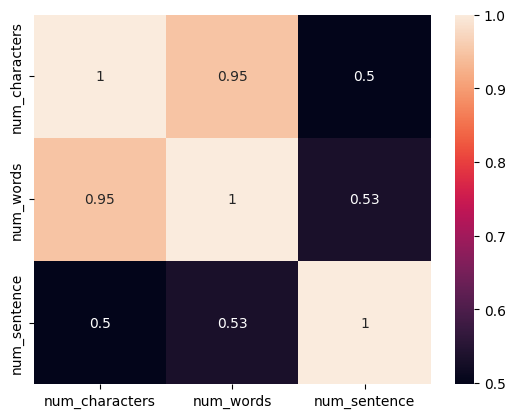

In [39]:
sns.heatmap(correlation_matrix, annot=True)

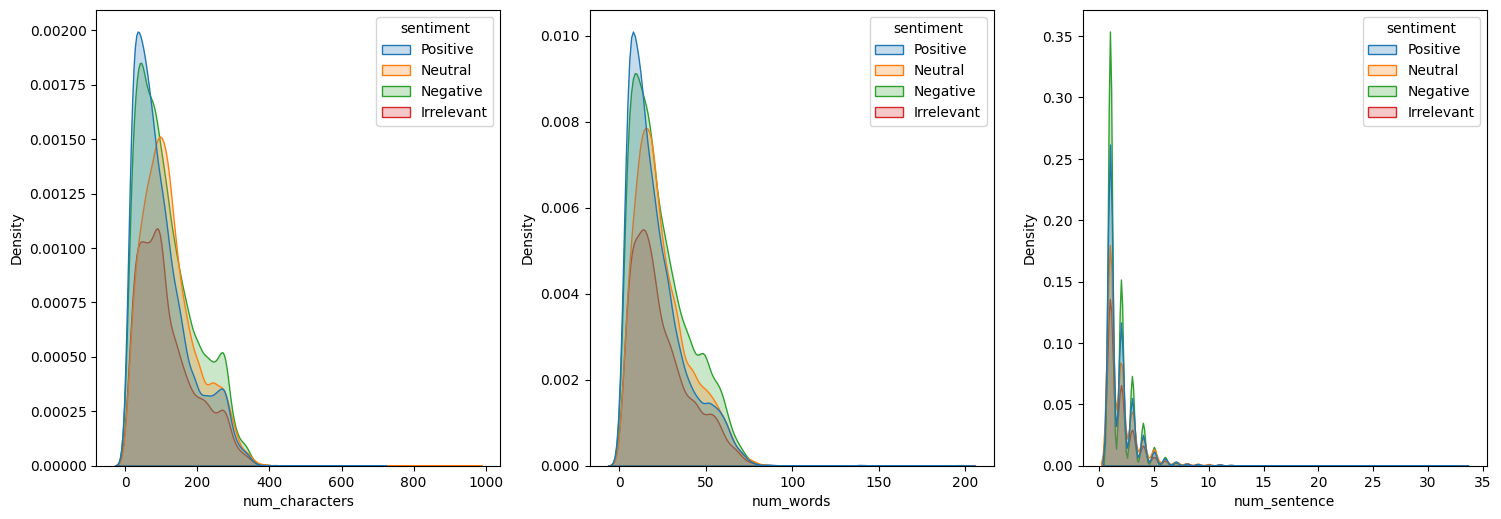

In [46]:
plt.figure(figsize=(20, 10))
num_cols=df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Create a list of tuples, each containing the model name and the corresponding classifier instance
models = [
    ("GaussianNB", GaussianNB()),
    ("MultinomialNB", MultinomialNB()),
    ("BernoulliNB", BernoulliNB()),
    ("LogisticRegression", LogisticRegression()),
    ("SVC", SVC()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("BaggingClassifier", BaggingClassifier()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("XGBClassifier", XGBClassifier())
]

# Iterate over the models and train/evaluate each one
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Precision:", precision)

In [ ]:
# Create an empty list to store results
results_list = []

# Iterate over the models and train/evaluate each one
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Append results to the list
    results_list.append({
        "Model": name,
        "Accuracy": acc,
        "Confusion Matrix": confusion_mat,
        "Precision": precision
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(results_list)

In [ ]:
results_df=results_df.drop(columns=['Confusion Matrix'])

In [ ]:
sorted_results_df = results_df.sort_values(by='Precision', ascending=False, ignore_index=True)
print(sorted_results_df)

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('SVC', SVC())
]

# Create a StackingClassifier with a final estimator
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))